# Important Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Pre-processing

In [2]:
data_path = "/content/sample_data/IMDB Dataset.csv"


In [3]:
df=pd.read_csv(data_path)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [4]:
df.shape

(50000, 2)

In [8]:
df=df.iloc[:10000]

In [9]:
df.shape

(10000, 2)

In [10]:
df['review'][0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
df['sentiment'].value_counts()


,count
sentiment,
positive,5028
negative,4972


In [12]:
df.isnull().sum()


,0
review,0
sentiment,0


In [13]:

df.duplicated().sum()

np.int64(17)

In [14]:

df.drop_duplicates(inplace=True)


In [15]:
df.duplicated().sum()


np.int64(0)

# Basic Preprocessing
    Remove tags - HTML
    Lower case
    emove stopwords




In [16]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [17]:
df['review'] = df['review'].apply(remove_tags)


In [18]:
df.head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, whi...",positive
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of al...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [19]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [20]:

df['review'] = df['review'].apply(lambda x:x.lower())


In [21]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df['review'][0]


"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [23]:

X = df.iloc[:,0:1]
y = df['sentiment']


In [24]:
X.head()

,review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha..."
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit..."
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r..."
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable..."
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ..."


In [25]:
y.head()

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive


In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [27]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [28]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [29]:
X_train.shape


(7986, 1)

In [30]:
X_test.shape


(1997, 1)

# Apllying Bag Of Word

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [32]:

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [33]:

X_train_bow


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Naive_bayes Classifier

In [34]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [35]:
y_pred=gnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6324486730095142

In [36]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]])

### Confusion Matrix Visualization

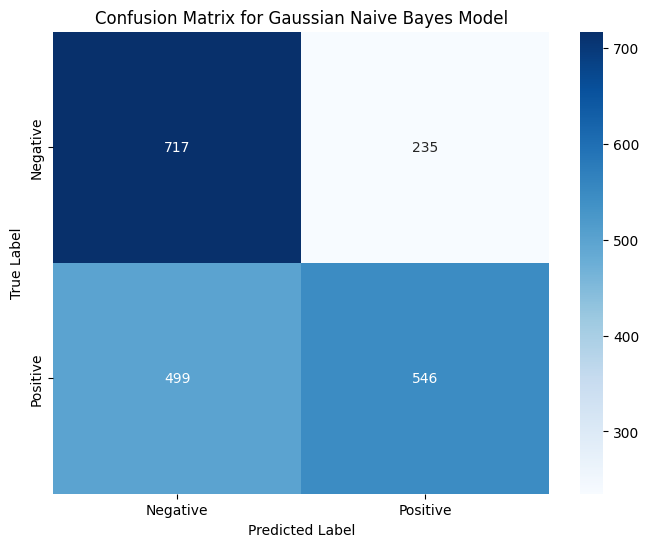

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gaussian Naive Bayes Model')
plt.show()

### Sentiment Distribution

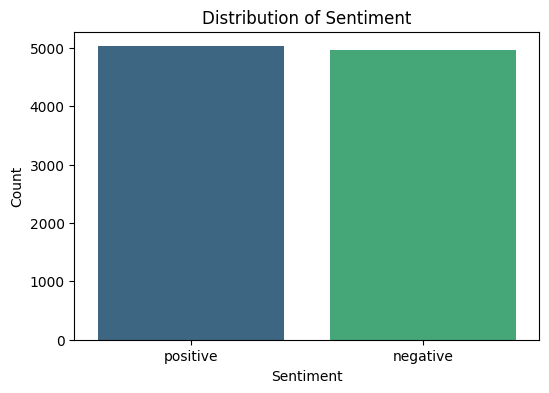

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='viridis', hue='sentiment', legend=False)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Real vs. Predicted Sentiment Distribution

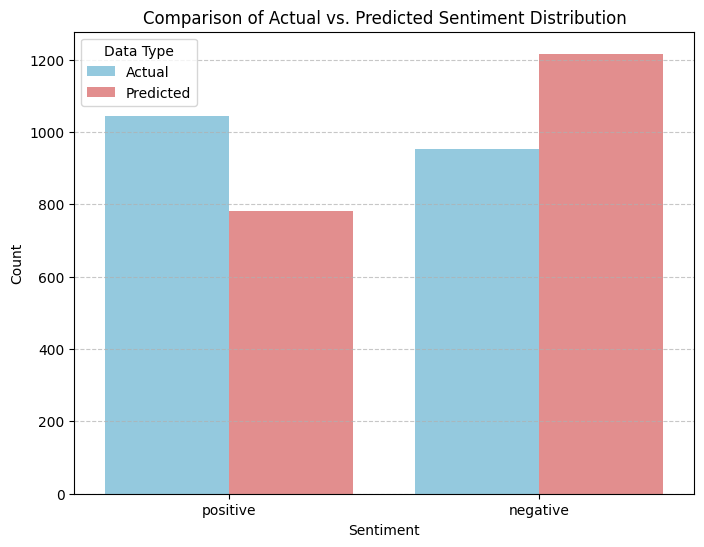

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert numerical labels back to original sentiment labels for better readability
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Create DataFrames for actual and predicted sentiments
df_actual = pd.DataFrame({'Sentiment': y_test_labels, 'Type': 'Actual'})
df_predicted = pd.DataFrame({'Sentiment': y_pred_labels, 'Type': 'Predicted'})

# Concatenate them for plotting
df_plot = pd.concat([df_actual, df_predicted])

plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot, x='Sentiment', hue='Type', palette={'Actual': 'skyblue', 'Predicted': 'lightcoral'})
plt.title('Comparison of Actual vs. Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Data Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Random-Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)

y_pred = rf.predict(X_test_bow)

accuracy_score(y_test,y_pred)


0.8467701552328493

In [42]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8352528793189785

# N grams

In [43]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8447671507260891

# TFIDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [47]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [48]:

rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)


0.842764146219329

# Task
Train a Word2Vec model on the preprocessed review text from the training data, generate Word2Vec embeddings for both training and test reviews by averaging word vectors, then train a RandomForestClassifier using these embeddings, and finally evaluate its performance by calculating the accuracy score, plotting the confusion matrix, and visualizing the real versus predicted sentiment distribution.

## Train Word2Vec Model



In [50]:
import sys
!{sys.executable} -m pip install gensim
from gensim.models import Word2Vec
print("Word2Vec imported successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 30.6 MB/s eta 0:00:00
Word2Vec imported successfully.


In [51]:
tokenized_reviews = X_train['review'].apply(lambda x: x.split())
print(f"First tokenized review: {tokenized_reviews.iloc[0]}")

First tokenized review: ['waiting', 'superhero', 'movie', 'like', 'long', 'time.', '"mystery', 'men"', 'takes', 'place', 'among', 'classic', 'comic-strip', 'spoofs', 'tv', 'like', '"batman"', '"captain', 'nice"', 'cartoons', 'like', '"underdog"', '"super', 'chicken."', 'spirit', 'lives', 'them:', 'comic', 'tongue-in-cheek', 'tone;', 'courage', 'aim', 'heroic', 'life', 'risk', 'looking', 'ridiculous;', 'not-so-sure-footed', 'way', 'characters', 'manage', 'prevail', 'adversaries.', 'misfired', 'spark', 'nobility', 'igniting', 'weak', 'ordinary,', 'wonderful', 'see', 'glow', 'high', 'bright', 'here."mystery', 'men"', 'opens', 'party', 'nursing', 'home.', 'wish', 'kinka', 'usher', 'sense', 'give', 'energy', 'life', 'old', 'people', 'scene.', 'is,', 'looks', 'like', 'something', 'george', 'romero', 'might', 'devised.', 'need', 'get', 'feeling', 'old', 'people', 'sharp', 'everyone', 'else,', 'feels', 'patronizing.', 'time', 'red', 'eyes', 'crash', 'festivities,', 'half', 'expect', 'tom', 'wa

In [52]:
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
model.build_vocab(tokenized_reviews)
model.train(tokenized_reviews, total_examples=model.corpus_count, epochs=10)
print("Word2Vec model trained successfully.")

Word2Vec model trained successfully.


In [53]:
def document_vector(model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.wv.key_to_index]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

X_test_tokenized = X_test['review'].apply(lambda x: x.split())

X_train_vectors = np.array([document_vector(model, doc) for doc in tokenized_reviews])
X_test_vectors = np.array([document_vector(model, doc) for doc in X_test_tokenized])

print(f"Shape of X_train_vectors: {X_train_vectors.shape}")
print(f"Shape of X_test_vectors: {X_test_vectors.shape}")

Shape of X_train_vectors: (7986, 100)
Shape of X_test_vectors: (1997, 100)


## Train Classifier with Word2Vec




In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_word2vec = RandomForestClassifier(random_state=42)
rf_word2vec.fit(X_train_vectors, y_train)
print("RandomForestClassifier trained with Word2Vec embeddings.")

RandomForestClassifier trained with Word2Vec embeddings.


In [55]:
y_pred_word2vec = rf_word2vec.predict(X_test_vectors)
print("Predictions on test data generated.")

Predictions on test data generated.


In [56]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_word2vec)
print(f"Accuracy score for Word2Vec embeddings with RandomForestClassifier: {accuracy}")

Accuracy score for Word2Vec embeddings with RandomForestClassifier: 0.7671507260891337


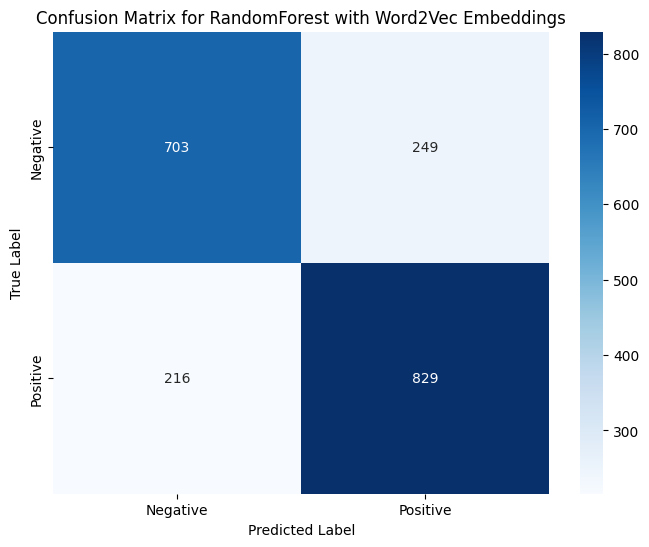

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm_word2vec = confusion_matrix(y_test, y_pred_word2vec)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForest with Word2Vec Embeddings')
plt.show()

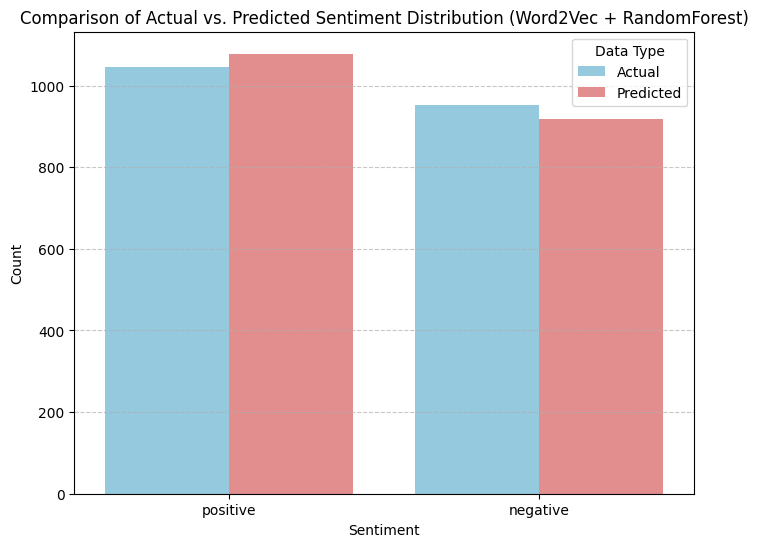

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert numerical labels back to original sentiment labels for better readability
y_test_labels_word2vec = encoder.inverse_transform(y_test)
y_pred_labels_word2vec = encoder.inverse_transform(y_pred_word2vec)

# Create DataFrames for actual and predicted sentiments
df_actual_word2vec = pd.DataFrame({'Sentiment': y_test_labels_word2vec, 'Type': 'Actual'})
df_predicted_word2vec = pd.DataFrame({'Sentiment': y_pred_labels_word2vec, 'Type': 'Predicted'})

# Concatenate them for plotting
df_plot_word2vec = pd.concat([df_actual_word2vec, df_predicted_word2vec])

plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot_word2vec, x='Sentiment', hue='Type', palette={'Actual': 'skyblue', 'Predicted': 'lightcoral'})
plt.title('Comparison of Actual vs. Predicted Sentiment Distribution (Word2Vec + RandomForest)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Data Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()